# FRAUD CHECK ANALYSIS

In [1]:
# importing the packages--
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import tree
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
# reading the data file--
def read_data():
    data=pd.read_csv(r"D:\Master in Data Science\Python\Projects\Random Forest Project 9 & 10\10. Random Forests/Fraud_check.csv")
    return data

In [3]:
# calling the function--
data= read_data()
print(data.head(2))

  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   

  Urban  
0   YES  
1   YES  


In [4]:
# copying the data--
data.copy()
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [5]:
# data analysis--
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [6]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
data.shape

(600, 6)

# Exploratory Data Analysis

<Axes: >

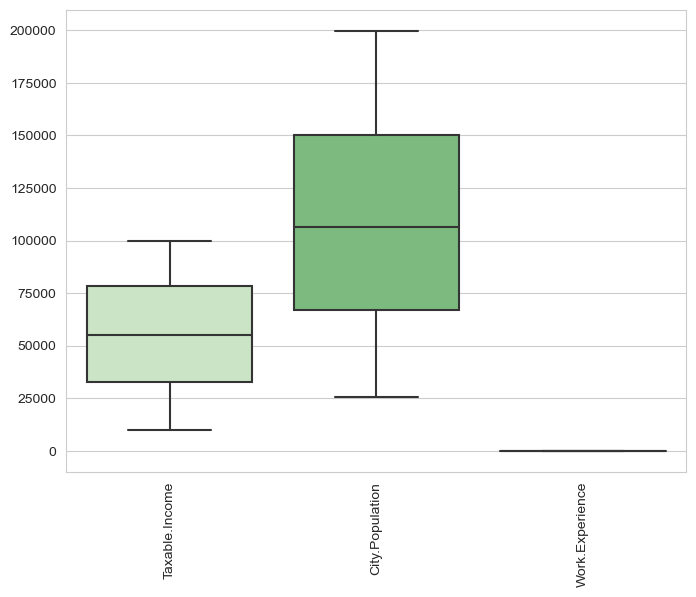

In [9]:
# checking the outliers--
sns.set_style("whitegrid")
plt.figure(figsize=(8,6))
plt.xticks(rotation=90,fontsize="medium")
sns.boxplot(data=data.loc[:, ['Taxable.Income', 'City.Population', 'Work.Experience']],palette="Greens")

Text(0.5, 1.0, 'Work.Experience V/S City.Population')

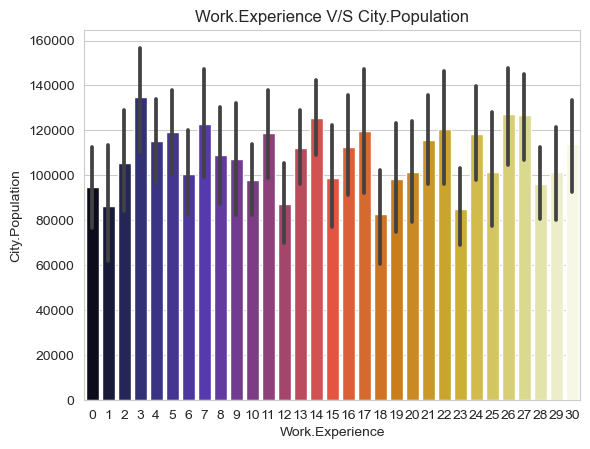

In [12]:
sns.barplot(x="Work.Experience",y="City.Population",data=data,palette='CMRmap')
plt.title("Work.Experience V/S City.Population")

Text(0.5, 1.0, 'Count of Work.Experience')

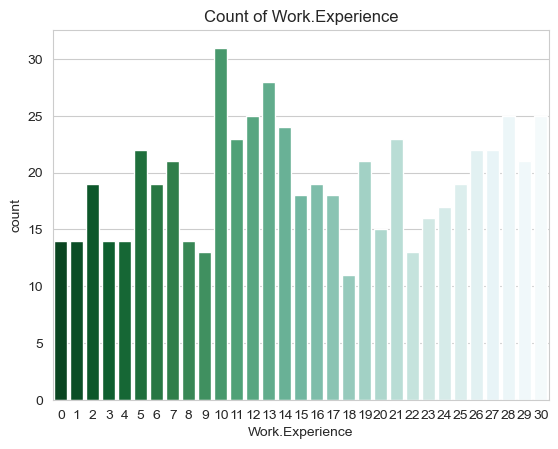

In [13]:
sns.countplot(x="Work.Experience",data=data,palette='BuGn_r')
plt.title("Count of Work.Experience")

Text(0.5, 1.0, 'City.Population V/S Taxable.Income')

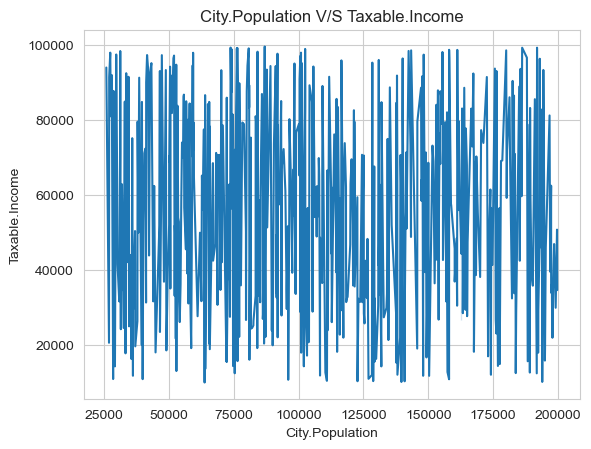

In [14]:
sns.lineplot(x="City.Population",y=data["Taxable.Income"],data=data)
plt.title("City.Population V/S Taxable.Income")

<Axes: >

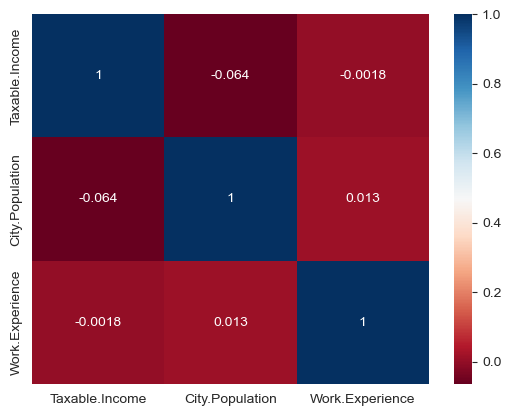

In [15]:
sns.heatmap(data [['Taxable.Income', 'City.Population', 'Work.Experience']].corr(),annot=True,cmap="RdBu")

In [9]:
data["TaxInc"] = pd.cut(data["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])
data["TaxInc"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [10]:
data_check = data.drop(columns=["Taxable.Income"])
data_check 

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,TaxInc
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good
...,...,...,...,...,...,...
595,YES,Divorced,39492,7,YES,Good
596,YES,Divorced,55369,2,YES,Good
597,NO,Divorced,154058,0,YES,Good
598,YES,Married,180083,17,NO,Good


In [11]:
FC = pd.get_dummies(data_check .drop(columns = ["TaxInc"]))

In [12]:
data_final = pd.concat([FC,data_check ["TaxInc"]], axis = 1)

In [13]:
colnames = list(data_final.columns)
colnames

['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES',
 'TaxInc']

In [14]:
predictors = colnames[:9]
predictors

['City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [15]:
target = colnames[9]
target

'TaxInc'

In [16]:
X = data_final[predictors]
X.shape

(600, 9)

In [17]:
Y = data_final[target]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: TaxInc, Length: 600, dtype: category
Categories (2, object): ['Risky' < 'Good']

In [18]:
# sampling the data--
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 40)

In [21]:
# featuring scaling--
sc = StandardScaler()

In [22]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Random Forest Classifier

In [23]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 40)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=40)

In [25]:
classifier.score(X_test, Y_test)

0.7166666666666667

In [26]:
y_pred = classifier.predict(X_test)

In [27]:
y_pred

array(['Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good'

In [30]:
cm = confusion_matrix(Y_test, y_pred)

In [31]:
print(cm)

[[85  7]
 [27  1]]


In [32]:
accuracy_score(Y_test, y_pred)

0.7166666666666667

In [33]:
classifier = RandomForestClassifier(n_estimators=100, criterion='gini')
classifier.fit(X_train, Y_train)

RandomForestClassifier()

In [34]:
classifier.score(X_test, Y_test)

0.675